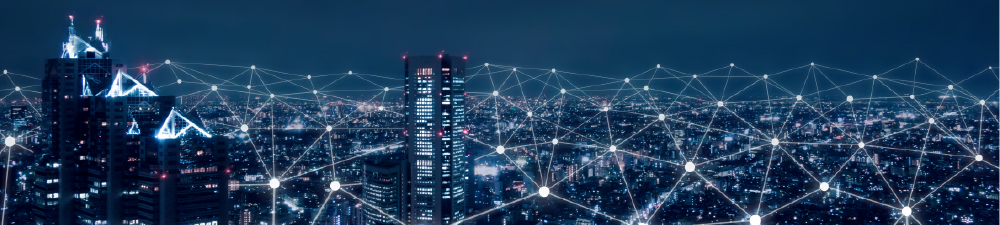

# Mini Project 3  - IU 4.6 Machine Learning

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#### additional packages
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [2]:
#edit the file location of raw data set
cust_df=pd.read_csv("Mini_project_3_Data.csv")

## Exercise

## Placeholder for your analysis

In [3]:
cust_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [4]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df.shape


(51047, 58)

In [5]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [6]:
cust_df.isnull().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [7]:
cust_df.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [8]:
cust_df.describe(include = "object")

,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,...,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
count,51047,51023,51047,51047,51047,51047,51047,51047,51047,51047,...,51047,51047,51047,51047,51047,51047,51047,51047,51047,51047
unique,2,747,2,2,2,2,2,2,2,2,...,2,2,2,2,16,2,7,4,8,3
top,No,NYCBRO917,No,No,Yes,No,No,Known,No,No,...,Yes,No,No,No,Unknown,No,2-High,Other,Other,Unknown
freq,36336,1684,38679,43956,46046,41524,46894,33987,32596,31821,...,34503,41223,44012,50368,28982,49302,18993,24655,37637,19700


In [9]:
#### display frequency table for all columns
def count_unique(cust_df, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(cust_df[col].value_counts())

cust_cols = cust_df.columns
count_unique(cust_df, cust_cols)



For column CustomerID
3257854    1
3288494    1
3075510    1
3355198    1
3190206    1
          ..
3040434    1
3318466    1
3088002    1
3310278    1
3018750    1
Name: CustomerID, Length: 51047, dtype: int64

For column Churn
No     36336
Yes    14711
Name: Churn, dtype: int64

For column MonthlyRevenue
29.99     1069
34.99      806
10.00      469
30.00      404
49.99      392
          ... 
141.31       1
145.29       1
116.87       1
171.31       1
196.47       1
Name: MonthlyRevenue, Length: 12665, dtype: int64

For column MonthlyMinutes
0.0       723
2.0       138
8.0       127
6.0       122
88.0      116
         ... 
1387.0      1
2129.0      1
2222.0      1
2565.0      1
2150.0      1
Name: MonthlyMinutes, Length: 2719, dtype: int64

For column TotalRecurringCharge
30.0     7302
45.0     6630
60.0     4435
40.0     4415
50.0     4143
         ... 
360.0       1
212.0       1
207.0       1
158.0       1
342.0       1
Name: TotalRecurringCharge, Length: 214, dtype: int64

For 

Name: RespondsToMailOffers, dtype: int64

For column OptOutMailings
No     50295
Yes      752
Name: OptOutMailings, dtype: int64

For column NonUSTravel
No     48168
Yes     2879
Name: NonUSTravel, dtype: int64

For column OwnsComputer
No     41583
Yes     9464
Name: OwnsComputer, dtype: int64

For column HasCreditCard
Yes    34503
No     16544
Name: HasCreditCard, dtype: int64

For column RetentionCalls
0    49302
1     1609
2      120
3       14
4        2
Name: RetentionCalls, dtype: int64

For column RetentionOffersAccepted
0    50166
1      837
2       36
3        8
Name: RetentionOffersAccepted, dtype: int64

For column NewCellphoneUser
No     41223
Yes     9824
Name: NewCellphoneUser, dtype: int64

For column NotNewCellphoneUser
No     44012
Yes     7035
Name: NotNewCellphoneUser, dtype: int64

For column ReferralsMadeBySubscriber
0     48663
1      2244
2       100
3        21
4         6
6         4
5         2
7         2
35        1
8         1
9         1
11        1
16    

In [10]:
cust_df['CustomerID'].unique

#there are no duplicates based on CustomerID

<bound method Series.unique of 0        3000002
1        3000010
2        3000014
3        3000022
4        3000026
          ...   
51042    3399958
51043    3399974
51044    3399978
51045    3399990
51046    3399994
Name: CustomerID, Length: 51047, dtype: int64>

In [11]:
#check object columns with '?' in the values
(cust_df.astype(object) == '?').any()

CustomerID                   False
Churn                        False
MonthlyRevenue               False
MonthlyMinutes               False
TotalRecurringCharge         False
DirectorAssistedCalls        False
OverageMinutes               False
RoamingCalls                 False
PercChangeMinutes            False
PercChangeRevenues           False
DroppedCalls                 False
BlockedCalls                 False
UnansweredCalls              False
CustomerCareCalls            False
ThreewayCalls                False
ReceivedCalls                False
OutboundCalls                False
InboundCalls                 False
PeakCallsInOut               False
OffPeakCallsInOut            False
DroppedBlockedCalls          False
CallForwardingCalls          False
CallWaitingCalls             False
MonthsInService              False
UniqueSubs                   False
ActiveSubs                   False
ServiceArea                  False
Handsets                     False
HandsetModels       

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

# Q1.1 Answer: 6 customers had zero monthly revenue

In [12]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis

cust1 = (cust_df['MonthlyRevenue'] == 0).sum()
cust1

6

In [13]:
#to remove the rows directly in dataframe and saving it
cust_df.drop(cust_df.index[cust_df['MonthlyRevenue'] == 0], inplace=True)
cust_df.shape

(51041, 58)

### Q1.2 How many columns has missing values percentage > 5%

## Qns1.2 Answer: There are 0 columns with more than 5% missing values.
### Since missing values are less than 5% of the dataset we will remove them.


In [14]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?

cust_df.isnull().sum() / cust_df.shape[0] *100 
    

CustomerID                   0.000000
Churn                        0.000000
MonthlyRevenue               0.305637
MonthlyMinutes               0.305637
TotalRecurringCharge         0.305637
DirectorAssistedCalls        0.305637
OverageMinutes               0.305637
RoamingCalls                 0.305637
PercChangeMinutes            0.715111
PercChangeRevenues           0.715111
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea 

<mark>__Result:__
    
Type your answer here for how would you impute the missing values (if any)

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

# Q1.3 Answer: Removed top 1% outliers from both columns "UniqueSubs" and "DirectorAssistedCalls

<AxesSubplot:>

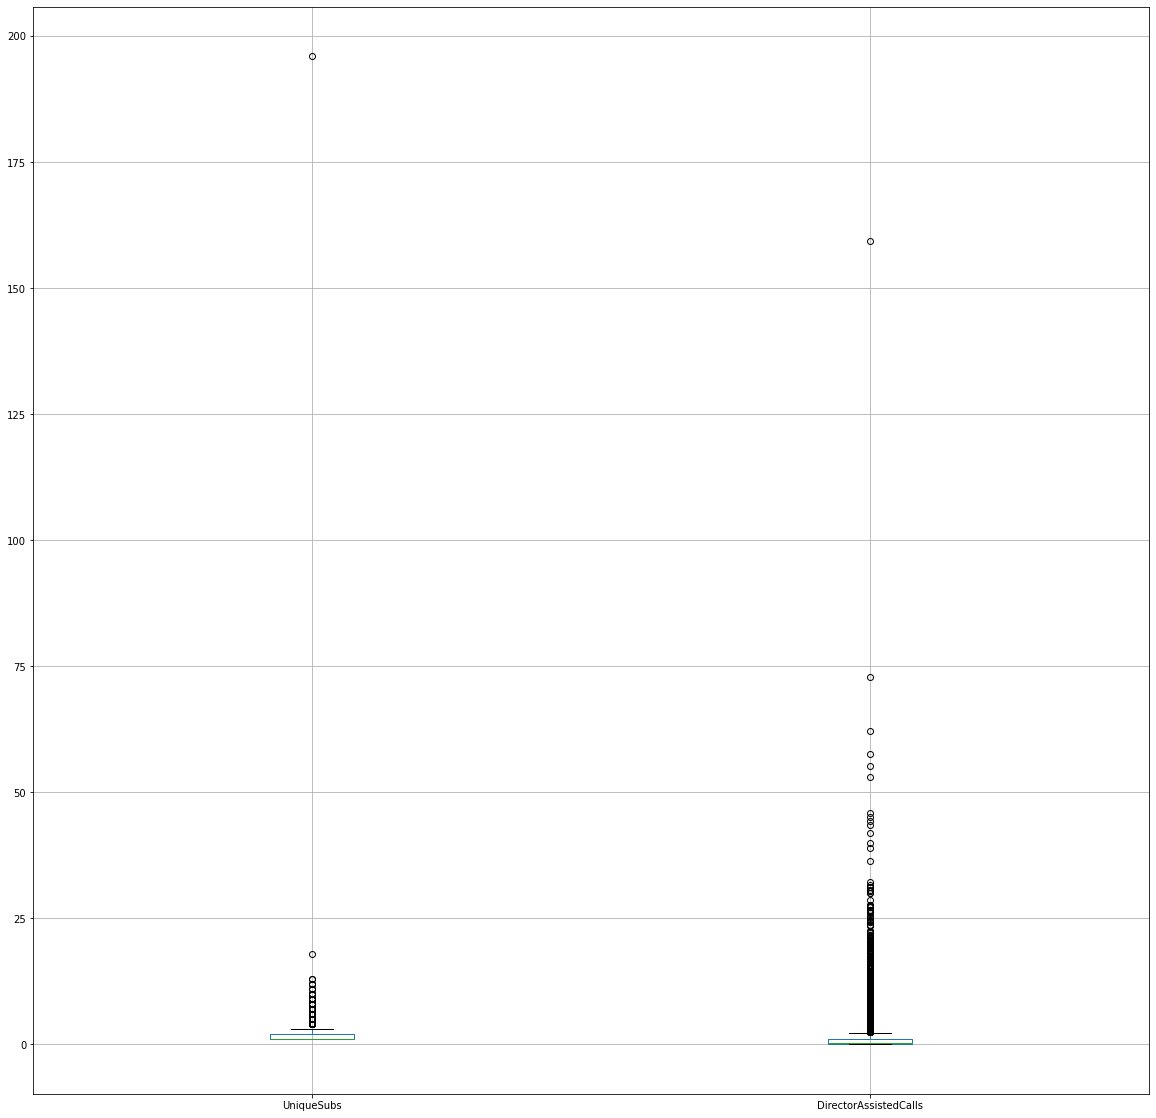

In [15]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
#cust_df.boxplot(column=cols)
cust_df.boxplot(column=cols, figsize = (20,20))


In [16]:
cust_df.shape

(51041, 58)

In [17]:
#### get 1% cut off for UniqueSubs or DirectorAssistedCalls separately
cust_df['UniqueSubs'].quantile(0.99) #cut off 5
cust_df['DirectorAssistedCalls'].quantile(0.99) #cut off 9.65

cust_df = cust_df[~((cust_df['UniqueSubs'] > cust_df['UniqueSubs'].quantile(0.99)) | (cust_df['DirectorAssistedCalls'] > cust_df['DirectorAssistedCalls'].quantile(0.99)))]
cust_df.shape

5.0

9.65

(50323, 58)

<AxesSubplot:>

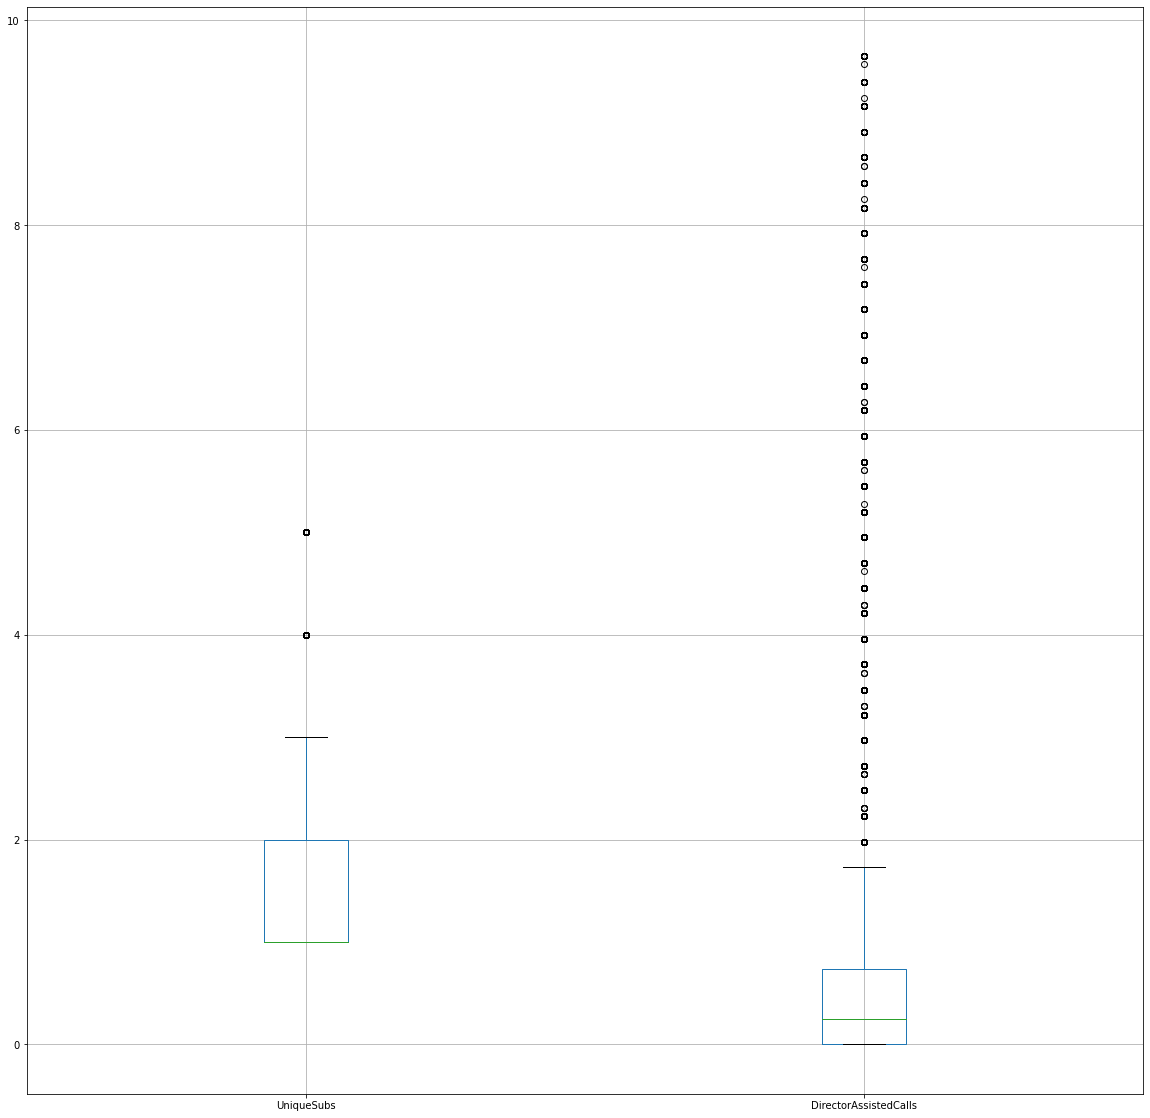

In [18]:
#cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols, figsize = (20,20))


## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

# Q2.1 Answer: Yes, a majority of the customers have high overage minutes and high revenue. However, the opposite is also true for a small number of outliers.

<AxesSubplot:xlabel='OverageMinutes', ylabel='MonthlyRevenue'>

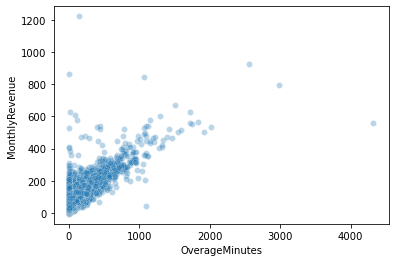

In [19]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
#### using transparency "alpha" to overcome overplotting
sns.scatterplot(y = 'MonthlyRevenue', x = 'OverageMinutes', data = cust_df, alpha = 0.3)

<mark>__Result:__
    
Type your interpretation here based on the scatter plot analysis

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

# Q2.2 Answer: Yes

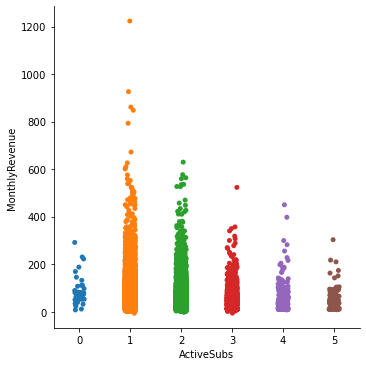

In [20]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x="ActiveSubs", y="MonthlyRevenue", data = cust_df) 

<mark>__Result:__
    
Type your interpretation here based on the category plot analysis

### Q2.3 Does credit rating have an impact in churn rate?

# Q2.3 Answer: Credit rating does have an impact on the churn rate. From what we have gathered, it seems that a higher credit rating leads to a higher churn, and a lower credit rating has a slightly lower churn rate, however the difference is not significant.

Text(0, 0.5, 'Proportion of Customers\n')

Text(0.5, 0, 'Credit Rating\n')

Text(0.5, 1.0, 'Churn Rate by Credit Rating \n')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '1-Highest'),
  Text(1, 0, '2-High'),
  Text(2, 0, '3-Good'),
  Text(3, 0, '4-Medium'),
  Text(4, 0, '5-Low'),
  Text(5, 0, '6-VeryLow'),
  Text(6, 0, '7-Lowest')])

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.0, 34.61077844311377, '69.2%')

Text(1.0, 34.97106757976323, '69.9%')

Text(2.0, 34.47463768115942, '68.9%')

Text(3.0, 36.95075757575758, '73.9%')

Text(4.0, 38.9193851944793, '77.8%')

Text(5.0, 36.515837104072396, '73.0%')

Text(6.0, 35.51312649164678, '71.0%')

Text(0.0, 84.61077844311377, '30.8%')

Text(1.0, 84.97106757976323, '30.1%')

Text(2.0, 84.47463768115942, '31.1%')

Text(3.0, 86.95075757575758, '26.1%')

Text(4.0, 88.9193851944793, '22.2%')

Text(5.0, 86.5158371040724, '27.0%')

Text(6.0, 85.51312649164677, '29.0%')

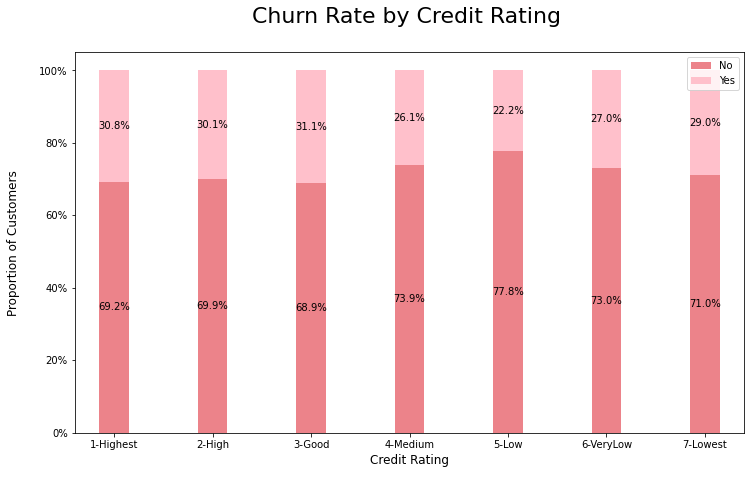

In [21]:

import matplotlib.ticker as mtick

credit_churn = cust_df.groupby(['CreditRating','Churn']).size().unstack()

colors  = ['#ec838a', 'pink']
ax = (credit_churn.T*100.0 / credit_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)

plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('Credit Rating\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")

plt.title('Churn Rate by Credit Rating \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

In [83]:
credit_churn.head(10)

Churn,No,Yes
CreditRating,,
1-Highest,5780,2570
2-High,13175,5662
3-Good,5709,2571
4-Medium,3902,1378
5-Low,4963,1413
6-VeryLow,807,298
7-Lowest,1488,607


<mark>__Result:__
    
Type your interpretation here based on the analysis above

### Placeholder for additional exploratory analysis

## Q3. Create additional features to help predict churn

In [27]:
#wrapper function to create additional features for churn prediction

def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge']= cust_df['TotalRecurringCharge'] / cust_df['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    cust_df['perc_overage_minutes']= cust_df['OverageMinutes'] / cust_df['MonthlyMinutes']
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    

    return cust_df  


In [28]:
#Make a call to the feature engineering wrapper function for churn prediction

create_features(cust_df)


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,30,Yes,1-Highest,Suburban,Professional,No,0.5,0.916667,0.000000
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,30,No,4-Medium,Suburban,Professional,Yes,1.0,1.000589,0.000000
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,Unknown,No,3-Good,Town,Crafts,Yes,1.0,1.000000,0.000000
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,10,No,4-Medium,Other,Other,No,1.0,0.911522,0.000000
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,1,10,No,1-Highest,Other,Professional,Yes,1.0,0.991832,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,60,No,1-Highest,Suburban,Other,Yes,1.0,NaN,NaN
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,1,60,No,3-Good,Other,Other,No,1.0,0.893139,0.025788
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,80,No,5-Low,Other,Clerical,No,1.0,NaN,NaN
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,30,No,5-Low,Other,Other,No,1.0,NaN,NaN


In [29]:
####check null values
cust_df.isnull().sum()


CustomerID                 0
Churn                      0
MonthlyRevenue           156
MonthlyMinutes           156
TotalRecurringCharge     156
                        ... 
Occupation                 0
MaritalStatus              0
perc_active_subs           0
perc_recurrent_charge    156
perc_overage_minutes     873
Length: 61, dtype: int64

In [30]:
## Remove rows with missing values, accounting for mising values coded as '?'

cols = cust_df.columns[0:62]
for column in cols:
    cust_df.loc[cust_df[column] == '?', column] = np.nan
cust_df.dropna(axis = 0, inplace = True)
cust_df.shape    

(48399, 61)

In [31]:
#lr_cust_df - dataframe for logistic regression.
lr_cust_df = cust_df.drop(['ServiceArea'], axis=1)
lr_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48399 entries, 0 to 51043
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 48399 non-null  float64
 1   Churn                      48399 non-null  object 
 2   MonthlyRevenue             48399 non-null  float64
 3   MonthlyMinutes             48399 non-null  float64
 4   TotalRecurringCharge       48399 non-null  float64
 5   DirectorAssistedCalls      48399 non-null  float64
 6   OverageMinutes             48399 non-null  float64
 7   RoamingCalls               48399 non-null  float64
 8   PercChangeMinutes          48399 non-null  float64
 9   PercChangeRevenues         48399 non-null  float64
 10  DroppedCalls               48399 non-null  float64
 11  BlockedCalls               48399 non-null  float64
 12  UnansweredCalls            48399 non-null  float64
 13  CustomerCareCalls          48399 non-null  flo

In [32]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48399 entries, 0 to 51043
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 48399 non-null  float64
 1   Churn                      48399 non-null  object 
 2   MonthlyRevenue             48399 non-null  float64
 3   MonthlyMinutes             48399 non-null  float64
 4   TotalRecurringCharge       48399 non-null  float64
 5   DirectorAssistedCalls      48399 non-null  float64
 6   OverageMinutes             48399 non-null  float64
 7   RoamingCalls               48399 non-null  float64
 8   PercChangeMinutes          48399 non-null  float64
 9   PercChangeRevenues         48399 non-null  float64
 10  DroppedCalls               48399 non-null  float64
 11  BlockedCalls               48399 non-null  float64
 12  UnansweredCalls            48399 non-null  float64
 13  CustomerCareCalls          48399 non-null  flo

In [33]:
# select only those columns that are of data type 'object'
categorical_features= lr_cust_df.select_dtypes(include=['object'])

# print the shape and top rows of categorical variables
print(categorical_features.shape)
categorical_features.head()


(48399, 22)


,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,...,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,No,No,Yes,No,No,Known,Yes,Yes,No,...,Yes,No,No,No,30,Yes,1-Highest,Suburban,Professional,No
1,Yes,Yes,No,No,No,No,Known,Yes,Yes,No,...,Yes,Yes,No,No,30,No,4-Medium,Suburban,Professional,Yes
2,No,Yes,No,No,No,No,Unknown,No,No,No,...,Yes,Yes,No,No,Unknown,No,3-Good,Town,Crafts,Yes
3,No,No,No,Yes,No,No,Known,Yes,Yes,No,...,Yes,Yes,No,No,10,No,4-Medium,Other,Other,No
5,No,No,No,Yes,No,No,Known,No,No,No,...,Yes,Yes,No,No,30,No,3-Good,Other,Other,Yes


In [ ]:
categorical_features.columns[0:22]

In [34]:
#### convert categorical col to numerical

cfdf = pd.get_dummies(lr_cust_df, columns=categorical_features.columns[0:22], drop_first=True)
cfdf.head()


,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_Unknown,MaritalStatus_Yes
0,3000002.0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,0,0,0,1,0,0,0,0,0
1,3000010.0,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,0,0,0,1,0,0,0,0,1
2,3000014.0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1
3,3000022.0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,0,0,1,0,0,0,0,0,0
5,3000030.0,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,9.0,...,0,0,0,1,0,0,0,0,0,1


In [35]:
cfdf.head()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_Unknown,MaritalStatus_Yes
0,3000002.0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,0,0,0,1,0,0,0,0,0
1,3000010.0,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,0,0,0,1,0,0,0,0,1
2,3000014.0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1
3,3000022.0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,0,0,1,0,0,0,0,0,0
5,3000030.0,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,9.0,...,0,0,0,1,0,0,0,0,0,1


## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [36]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

#Define columns to be included in X and y
# X = Independent variables
# Y = Dependent variable (churn flag)

y = cfdf[['Churn_Yes']]
X = cfdf.drop(["Churn_Yes"], axis=1)

#### Randomly sample cases to create independent training and test data, setting the random seed to 0 ()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


#Feature scaling for all continuous variable
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()

#Create dummy variables for all categorical variables
#X = pd.get_dummies(X)


In [37]:
#### Feature scaling for all variable
scaler = preprocessing.StandardScaler().fit(X_train)
X_trains = scaler.transform(X_train)
X_tests = scaler.transform(X_test)
X_trains


array([[-0.73082864, -0.5311467 , -0.9592076 , ..., -0.08811185,
        -0.77441987, -0.7698422 ],
       [ 1.23230968,  1.39960884,  0.75641655, ..., -0.08811185,
        -0.77441987, -0.7698422 ],
       [ 1.59179434, -1.12912472, -0.99250167, ..., -0.08811185,
        -0.77441987,  1.2989675 ],
       ...,
       [ 1.31482337, -0.05849061,  0.12382911, ..., -0.08811185,
         1.29128919, -0.7698422 ],
       [ 1.38210641,  0.10133004, -0.09160315, ..., -0.08811185,
        -0.77441987,  1.2989675 ],
       [-1.53523401, -0.01483915, -0.69285499, ..., -0.08811185,
        -0.77441987,  1.2989675 ]])

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [38]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set

logistic_mod = linear_model.LogisticRegression(max_iter=1000) 
logistic_mod.fit(X_trains, y_train)

LogisticRegression(max_iter=1000)

In [39]:
#### examine the model coefficients 
print(logistic_mod.intercept_)
print(logistic_mod.coef_)


[-0.98743966]
[[-0.06815434 -0.0567608  -0.12274355  0.04295781 -0.00403983  0.08481061
   0.0412201  -0.14964518  0.10677777  0.1168557   0.10717303  0.05254036
  -0.04364851 -0.03149441  0.02967507  0.02532391 -0.03192835 -0.07125252
  -0.03233553 -0.10330852  0.0042418  -0.00114256 -0.25625047  0.07066455
  -0.06077395  0.0900682   0.00579088  0.35570624 -0.08595417 -0.00308612
   0.03038605 -0.00719011 -0.01286319 -0.03416204 -0.03493966 -0.05943756
  -0.09279184  0.04461695  0.06063455  0.07222373 -0.04169865  0.00987569
  -0.01845035  0.03348512 -0.01773645 -0.06658054 -0.00382157  0.00752107
   0.00924485  0.09153669 -0.00359367  0.00668328  0.00781519  0.02156335
   0.00945854  0.01245746 -0.09059268  0.01573559 -0.05429637  0.02629021
   0.01927099  0.00928423  0.0134034  -0.01524753 -0.08244125  0.01166915
   0.00505263 -0.02985517  0.10503776  0.03947941  0.02332972 -0.04875849
  -0.12001119 -0.02357512 -0.00354133  0.01309979 -0.0336799   0.00972977
  -0.0149131   0.0089681

In [40]:
#### logistic regression model outputs probabilities for each class. 
probabilities = logistic_mod.predict_proba(X_tests)
print(probabilities[:15,:]) #15 sets of results

#### The first column is the probability of a score of 0 and the second column is the probability of a score of 1
#### the probability of a score of 0 is higher than 1

[[0.78859851 0.21140149]
 [0.73848281 0.26151719]
 [0.74175469 0.25824531]
 [0.79097737 0.20902263]
 [0.79475179 0.20524821]
 [0.77336392 0.22663608]
 [0.73391119 0.26608881]
 [0.70563792 0.29436208]
 [0.69666437 0.30333563]
 [0.75793749 0.24206251]
 [0.67510914 0.32489086]
 [0.71984428 0.28015572]
 [0.75409339 0.24590661]
 [0.82633722 0.17366278]
 [0.67657618 0.32342382]]


In [41]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted model


#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:30]))
print(y_test[:30].values.flatten())

#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix

def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores,zero_division=0)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('              0             1')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    

    
print_metrics(y_test, scores)    


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1]
                 Confusion matrix
                 Score positive    Score negative
Actual positive     10221               150
Actual negative      4015               134

Accuracy  0.71
 
              0             1
Num case    10371          4149
Precision    0.72          0.47
Recall       0.99          0.03
F1           0.83          0.06


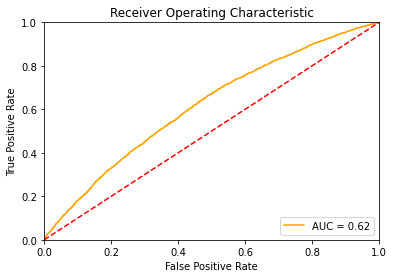

Gini:  0.2306322399685108


In [42]:
#### getting the number for ROC and AUC to be used for GINI

def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


    gini = (2*auc)-1
    print("Gini: ",gini)
    
plot_auc(y_test, probabilities)    

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [43]:
categorical_features_rf= cust_df.select_dtypes(include=['object'])

# print the shape and top rows of categorical variables
print(categorical_features_rf.shape)
categorical_features_rf.head()

(48399, 23)


,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,...,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,SEAPOR503,No,No,Yes,No,No,Known,Yes,Yes,...,Yes,No,No,No,30,Yes,1-Highest,Suburban,Professional,No
1,Yes,PITHOM412,Yes,No,No,No,No,Known,Yes,Yes,...,Yes,Yes,No,No,30,No,4-Medium,Suburban,Professional,Yes
2,No,MILMIL414,Yes,No,No,No,No,Unknown,No,No,...,Yes,Yes,No,No,Unknown,No,3-Good,Town,Crafts,Yes
3,No,PITHOM412,No,No,Yes,No,No,Known,Yes,Yes,...,Yes,Yes,No,No,10,No,4-Medium,Other,Other,No
5,No,OKCTUL918,No,No,Yes,No,No,Known,No,No,...,Yes,Yes,No,No,30,No,3-Good,Other,Other,Yes


In [44]:
cfdf_rf = pd.get_dummies(cust_df, columns=categorical_features_rf.columns[0:23], drop_first=False)
cfdf_rf.head()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes
0,3000002.0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,0,0,1,0,0,0,1,0,0
1,3000010.0,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,0,0,1,0,0,0,0,0,1
2,3000014.0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,3000022.0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,0,1,0,0,0,0,1,0,0
5,3000030.0,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,9.0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
cfdf_rf.info()

In [45]:
from sklearn.model_selection import train_test_split
y_rf = cfdf_rf[['Churn_Yes']]
X_rf = cfdf_rf.drop(["Churn_Yes","Churn_No", "CustomerID"], axis=1)

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=0)

In [46]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set

#### import RandomFroest classifier
from sklearn.ensemble import RandomForestClassifier

#### instantiate the classifier
rfc = RandomForestClassifier(random_state=0)

#### fit the model
rfc.fit(X_train_rf, y_train_rf)



RandomForestClassifier(random_state=0)

In [47]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model
y_pred_rf = rfc.predict(X_test_rf)

#### check accuracy score
from sklearn.metrics import accuracy_score

print('Model acuracy score with 100 decision-trees : {0:0.4f}'.format(accuracy_score(y_test_rf, y_pred_rf)))



#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

probabilities_rf = rfc.predict_proba(X_test_rf)
print(probabilities_rf[:15,:]) #15 sets of results


def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores_rf = score_model(probabilities_rf, 0.5)
print(np.array(scores_rf[:30]))
print(y_test_rf[:30].values.flatten())

#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix

def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores,zero_division=0)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('              0             1')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

    
print_metrics(y_test_rf, scores_rf)    

Model acuracy score with 100 decision-trees : 0.7150
[[0.74 0.26]
 [0.7  0.3 ]
 [0.84 0.16]
 [0.91 0.09]
 [0.85 0.15]
 [0.68 0.32]
 [0.79 0.21]
 [0.72 0.28]
 [0.57 0.43]
 [0.76 0.24]
 [0.78 0.22]
 [0.63 0.37]
 [0.66 0.34]
 [0.79 0.21]
 [0.74 0.26]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1]
                 Confusion matrix
                 Score positive    Score negative
Actual positive     10300                71
Actual negative      4067                82

Accuracy  0.72
 
              0             1
Num case    10371          4149
Precision    0.72          0.54
Recall       0.99          0.02
F1           0.83          0.04


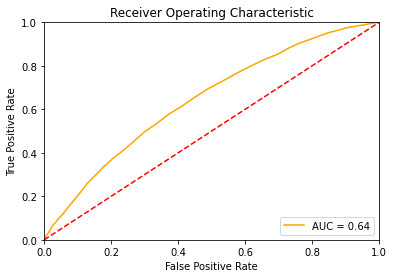

Gini:  0.2868298350990264


In [48]:
plot_auc(y_test_rf, probabilities_rf)    

<mark>__Result:__
    
Type your answer from the model building exercise here, i.e., which model has better accuracy and using what metrics?

# Q4.2 Answer: Random Forest shows a higher score in both accuracy and Gini.

### Q4.3 Identify most important features impacting churn

In [49]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

feature_scores_rf = pd.Series(rfc.feature_importances_, index=X_train_rf.columns).sort_values(ascending=False)

# print the feature_scores
feature_scores_rf.head(20)

CurrentEquipmentDays     0.040906
PercChangeMinutes        0.034267
perc_recurrent_charge    0.032298
MonthsInService          0.032046
MonthlyMinutes           0.031115
MonthlyRevenue           0.029904
PercChangeRevenues       0.029720
OffPeakCallsInOut        0.027942
PeakCallsInOut           0.027263
ReceivedCalls            0.027162
UnansweredCalls          0.026870
OutboundCalls            0.025923
DroppedBlockedCalls      0.024862
DroppedCalls             0.023880
TotalRecurringCharge     0.023038
InboundCalls             0.021581
BlockedCalls             0.021122
perc_overage_minutes     0.021010
AgeHH1                   0.020666
OverageMinutes           0.019524
dtype: float64

# Rerun random forest with top 20 impt features

In [50]:
X_rf2 = cfdf_rf[["CurrentEquipmentDays","PercChangeMinutes","perc_recurrent_charge","MonthsInService","MonthlyMinutes","MonthlyRevenue","PercChangeRevenues","OffPeakCallsInOut","PeakCallsInOut","ReceivedCalls","UnansweredCalls","OutboundCalls","DroppedBlockedCalls","DroppedCalls","TotalRecurringCharge","InboundCalls","BlockedCalls","perc_overage_minutes","AgeHH1","OverageMinutes"]]

X_train_rf2, X_test_rf2, y_train_rf2, y_test_rf2 = train_test_split(X_rf2, y_rf, test_size=0.3, random_state=0)


In [51]:
rfc.fit(X_train_rf2, y_train_rf2)

RandomForestClassifier(random_state=0)

In [52]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model
y_pred_rf2 = rfc.predict(X_test_rf2)

from sklearn.metrics import accuracy_score

print('Model acuracy score with 100 decision-trees : {0:0.4f}'.format(accuracy_score(y_test_rf2, y_pred_rf2)))
print('\n')


#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

probabilities_rf2 = rfc.predict_proba(X_test_rf2)
print('Probability')
print(probabilities_rf2[:15,:]) #15 sets of results
print('\n')

def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores_rf2 = score_model(probabilities_rf2, 0.5)
print(np.array(scores_rf2[:30]))
print(y_test_rf2[:30].values.flatten())

#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix

def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores,zero_division=0)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('              0             1')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    

    
print_metrics(y_test_rf2, scores_rf2)    

Model acuracy score with 100 decision-trees : 0.7172


Probability
[[0.79 0.21]
 [0.57 0.43]
 [0.85 0.15]
 [0.94 0.06]
 [0.86 0.14]
 [0.47 0.53]
 [0.67 0.33]
 [0.76 0.24]
 [0.61 0.39]
 [0.83 0.17]
 [0.79 0.21]
 [0.65 0.35]
 [0.62 0.38]
 [0.66 0.34]
 [0.76 0.24]]


[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1]
                 Confusion matrix
                 Score positive    Score negative
Actual positive     10073               298
Actual negative      3808               341

Accuracy  0.72
 
              0             1
Num case    10371          4149
Precision    0.73          0.53
Recall       0.97          0.08
F1           0.83          0.14


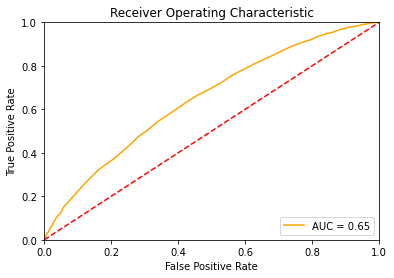

Gini:  0.2930230367094926


In [54]:
plot_auc(y_test_rf2, probabilities_rf2)  

In [55]:
feature_scores_rf2 = pd.Series(rfc.feature_importances_, index=X_train_rf2.columns).sort_values(ascending=False)

# print the feature_scores
feature_scores_rf2.head(20)

CurrentEquipmentDays     0.079287
PercChangeMinutes        0.069311
MonthlyMinutes           0.064703
perc_recurrent_charge    0.061931
MonthlyRevenue           0.058616
PercChangeRevenues       0.057710
MonthsInService          0.053677
PeakCallsInOut           0.053422
OffPeakCallsInOut        0.052697
ReceivedCalls            0.051494
UnansweredCalls          0.050457
OutboundCalls            0.048202
DroppedBlockedCalls      0.042376
AgeHH1                   0.041487
DroppedCalls             0.039693
InboundCalls             0.037670
perc_overage_minutes     0.035808
TotalRecurringCharge     0.035800
BlockedCalls             0.035317
OverageMinutes           0.030343
dtype: float64

## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [56]:
holdout_df=pd.read_csv("Mini_project_3_Hold_Out_Data.csv")

In [57]:
create_features(holdout_df)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,1,150,No,5-Low,Other,Other,No,1.000000,0.643590,0.047619
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,2,80,No,1-Highest,Other,Professional,No,1.000000,1.303639,0.000000
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,3,10,No,3-Good,Suburban,Crafts,Yes,1.000000,0.513663,0.404235
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,1,200,No,1-Highest,Other,Other,No,0.666667,0.842933,0.104575
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,10,No,1-Highest,Suburban,Other,No,1.000000,0.904650,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3399938,NaN,85.15,815.0,88.0,0.00,1.0,0.4,0.0,0.0,...,0,40,No,1-Highest,Other,Other,Unknown,0.666667,1.033470,0.001227
19996,3399950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,Unknown,No,1-Highest,Suburban,Other,Yes,1.000000,NaN,NaN
19997,3399966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,Unknown,No,1-Highest,Suburban,Other,No,1.000000,NaN,NaN
19998,3399970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,150,No,3-Good,Other,Other,Unknown,1.000000,NaN,NaN


In [58]:
holdout_df.describe()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
count,2.000000e+04,0.0,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19865.000000,19865.000000,...,19665.000000,19665.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,19938.000000,19646.000000
mean,3.201925e+06,NaN,58.899712,525.912136,46.946640,0.893764,40.240722,1.186765,-9.052806,-1.237246,...,31.469413,21.192321,0.036500,0.017000,0.04775,4.359000,0.051250,0.936024,0.902726,0.062587
std,1.165204e+05,NaN,43.564203,530.825481,24.083351,2.116538,95.740506,6.848963,249.609021,36.638292,...,22.050726,23.882983,0.204132,0.138967,0.24119,3.134009,0.353312,0.169230,0.289169,0.111504
min,3.000006e+06,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2518.000000,-459.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100522e+06,NaN,33.720000,159.000000,30.000000,0.000000,0.000000,0.000000,-82.000000,-7.200000,...,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.727509,0.000000
50%,3.201338e+06,NaN,48.665000,365.000000,45.000000,0.250000,2.000000,0.000000,-4.000000,-0.300000,...,36.000000,0.000000,0.000000,0.000000,0.00000,5.000000,0.000000,1.000000,0.952878,0.008396
75%,3.304237e+06,NaN,70.882500,718.000000,60.000000,0.990000,40.000000,0.300000,66.000000,1.600000,...,48.000000,44.000000,0.000000,0.000000,0.00000,7.000000,0.000000,1.000000,1.097741,0.082853
max,3.399986e+06,NaN,635.060000,7668.000000,350.000000,67.810000,3472.000000,488.800000,3222.000000,895.600000,...,98.000000,99.000000,4.000000,4.000000,5.00000,9.000000,14.000000,1.000000,4.109589,1.000000


In [59]:
(holdout_df.astype(object) == '?').any()

CustomerID               False
Churn                    False
MonthlyRevenue           False
MonthlyMinutes           False
TotalRecurringCharge     False
                         ...  
Occupation               False
MaritalStatus            False
perc_active_subs         False
perc_recurrent_charge    False
perc_overage_minutes     False
Length: 61, dtype: bool

In [60]:
tst = holdout_df.isnull().sum()
tst.head(60)

CustomerID                       0
Churn                        20000
MonthlyRevenue                  60
MonthlyMinutes                  60
TotalRecurringCharge            60
DirectorAssistedCalls           60
OverageMinutes                  60
RoamingCalls                    60
PercChangeMinutes              135
PercChangeRevenues             135
DroppedCalls                     0
BlockedCalls                     0
UnansweredCalls                  0
CustomerCareCalls                0
ThreewayCalls                    0
ReceivedCalls                    0
OutboundCalls                    0
InboundCalls                     0
PeakCallsInOut                   0
OffPeakCallsInOut                0
DroppedBlockedCalls              0
CallForwardingCalls              0
CallWaitingCalls                 0
MonthsInService                  0
UniqueSubs                       0
ActiveSubs                       0
ServiceArea                      4
Handsets                         0
HandsetModels       

In [61]:
holdout_df.drop(["Churn"],axis=1, inplace=True)

In [62]:
holdout_df.columns[1:60]

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
       'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',


In [63]:
cols = holdout_df.columns[1:60]
for column in cols:
    holdout_df.loc[holdout_df[column] == '?', column] = np.nan
holdout_df.dropna(axis = 0, inplace = True)
holdout_df.shape

(19252, 60)

In [68]:
categorical_features_horf= holdout_df.select_dtypes(include=['object'])

# print the shape and top rows of categorical variables
print(categorical_features_horf.shape)
categorical_features_horf.head()

(19252, 22)


,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,...,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,MILMIL414,No,No,Yes,Yes,Yes,Unknown,Yes,Yes,No,...,Yes,No,Yes,No,150,No,5-Low,Other,Other,No
1,NNYSYR315,No,No,Yes,No,No,Known,No,No,No,...,Yes,Yes,No,No,80,No,1-Highest,Other,Professional,No
2,MILMIL414,No,No,No,No,No,Unknown,No,No,No,...,No,Yes,No,No,10,No,3-Good,Suburban,Crafts,Yes
3,SLCSLC801,Yes,No,Yes,Yes,Yes,Known,Yes,Yes,Yes,...,Yes,No,Yes,No,200,No,1-Highest,Other,Other,No
4,OKCTUL918,No,No,Yes,No,No,Known,Yes,Yes,No,...,Yes,No,Yes,No,10,No,1-Highest,Suburban,Other,No


In [69]:
categorical_features_horf.columns[0:22]

Index(['ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

In [70]:
hodf_rf = pd.get_dummies(holdout_df, columns=categorical_features_horf.columns[0:23], drop_first=False)
hodf_rf.head()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes
0,3000006,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,...,0,0,1,0,0,0,0,1,0,0
1,3000018,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,...,0,0,0,1,0,0,0,1,0,0
2,3000034,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,...,1,0,0,0,0,0,0,0,0,1
3,3000070,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,...,0,0,1,0,0,0,0,1,0,0
4,3000074,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
hodf_rf.head(20)

In [ ]:
#Type your code here to predict churners based on the hold out data set provided
#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4

#Use "predict" function on the transformend data using the best fitted model object



In [73]:
X_horf = hodf_rf[["CurrentEquipmentDays","PercChangeMinutes","perc_recurrent_charge","MonthsInService","MonthlyMinutes","MonthlyRevenue","PercChangeRevenues","OffPeakCallsInOut","PeakCallsInOut","ReceivedCalls","UnansweredCalls","OutboundCalls","DroppedBlockedCalls","DroppedCalls","TotalRecurringCharge","InboundCalls","BlockedCalls","perc_overage_minutes","AgeHH1","OverageMinutes"]]


In [74]:
y_pred_horf = rfc.predict(X_horf)
print('done')

done


In [75]:
y_pred_horf

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [76]:
len(y_pred_horf)

19252

In [77]:
hodf_rf["Predicted_Churn"] = y_pred_horf

In [78]:
hodf_rf['Predicted_Churn'].value_counts(normalize=True)

0    0.955433
1    0.044567
Name: Predicted_Churn, dtype: float64

In [81]:
Churn_List_df = hodf_rf[hodf_rf['Predicted_Churn']==1]

In [82]:
Churn_List_df

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes,Predicted_Churn
22,3000498,21.55,14.0,20.0,0.00,4.0,0.0,-14.0,-1.6,1.3,...,0,1,0,0,0,0,1,0,0,1
85,3001926,56.28,483.0,50.0,0.99,44.0,0.0,37.0,-2.3,6.3,...,0,1,0,0,0,0,0,1,0,1
137,3003098,152.06,836.0,57.0,1.24,244.0,1.2,1134.0,238.9,21.3,...,0,1,0,0,0,0,0,0,1,1
172,3003686,22.05,27.0,20.0,0.00,10.0,0.0,10.0,1.4,1.7,...,0,0,1,0,0,0,0,0,1,1
197,3004066,60.78,33.0,70.0,0.25,0.0,0.0,-33.0,-0.8,0.0,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19835,3396642,33.42,30.0,30.0,0.00,0.0,0.0,-30.0,-0.2,1.7,...,0,1,0,0,0,0,0,0,1,1
19839,3396698,92.63,295.0,60.0,1.24,138.0,0.0,736.0,127.9,0.0,...,0,1,0,0,0,0,0,1,0,1
19842,3396790,51.27,897.0,70.0,0.33,59.0,0.0,1.0,6.7,23.3,...,0,1,0,0,0,0,0,1,0,1
19849,3396902,50.56,140.0,50.0,0.25,30.0,0.0,-140.0,-10.6,1.0,...,0,0,1,0,0,0,0,0,1,1


## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

In [ ]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)






<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?
   